In [1]:
# SETUP IMPORTS 
import re
import json
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
# from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%reload_ext autoreload
%autoreload 2
from classes.data_prepper import DataPrepper

p = DataPrepper()

constructor of DataPrepper


In [25]:
# 1_newsDataset
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/1_newsDataset.json')
df['category'] = df['articles'].apply(lambda x: x['category'])
df['headline'] = df['articles'].apply(lambda x: x['headline'])
df['authors'] = df['articles'].apply(lambda x: x['authors'])
df['link'] = df['articles'].apply(lambda x: x['link'])
df['short_descrisption'] = df['articles'].apply(lambda x: x['short_description'])
df['date'] = df['articles'].apply(lambda x: x['date'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data

shape: (200853, 7)


,category,headline,authors,link,short_descrisption,date
0,CRIME,There Were 2 Mas...,Melissa Jeltsen,https://www.huff...,She left her hus...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins...,Andy McDonald,https://www.huff...,Of course it has...,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marri...,Ron Dicker,https://www.huff...,The actor and hi...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blast...,Ron Dicker,https://www.huff...,The actor gives ...,2018-05-26
4,ENTERTAINMENT,Julianna Marguli...,Ron Dicker,https://www.huff...,"The ""Dietland"" a...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten...,"Reuters, Reuters",https://www.huff...,Verizon Wireless...,2012-01-28
200849,SPORTS,Maria Sharapova ...,,https://www.huff...,"Afterward, Azare...",2012-01-28
200850,SPORTS,Giants Over Patr...,,https://www.huff...,Leading up to Su...,2012-01-28
200851,SPORTS,Aldon Smith Arre...,,https://www.huff...,CORRECTION: An e...,2012-01-28


Text(0.5, 1.0, "Distribution of articles' categories")

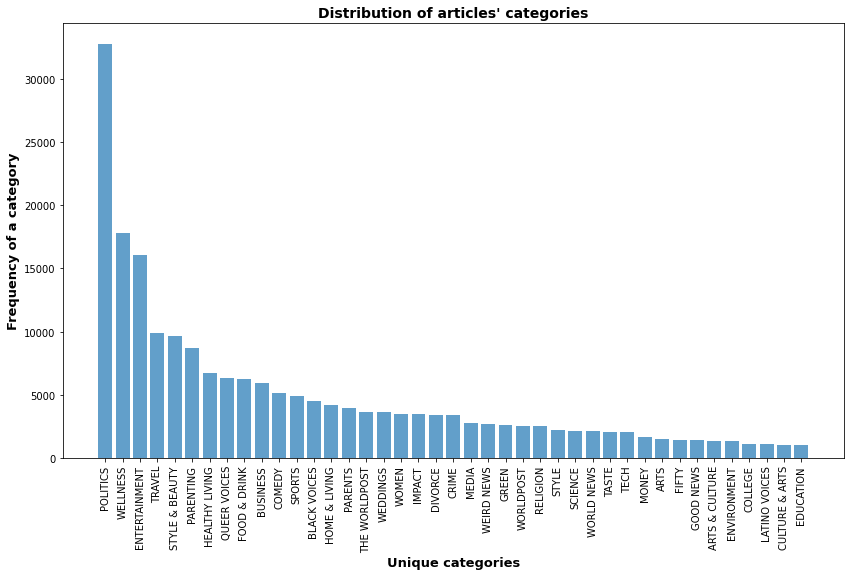

In [7]:
# 1_newsDataset categories' distribution
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/1_newsDataset.json')
df['category'] = df['articles'].apply(lambda x: x['category'])
df['headline'] = df['articles'].apply(lambda x: x['headline'])
df['authors'] = df['articles'].apply(lambda x: x['authors'])
df['link'] = df['articles'].apply(lambda x: x['link'])
df['short_descrisption'] = df['articles'].apply(lambda x: x['short_description'])
df['date'] = df['articles'].apply(lambda x: x['date'])
data = df.drop('articles', axis=1)

my_cmap = plt.get_cmap("tab20")
count = data.category.value_counts()
rescale = lambda y: y - np.max(y)
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(14,8))
bars = plt.bar(count.index, count, color=my_cmap(rescale(list(count))), width=0.8, alpha=0.7, align='center')
plt.xticks(rotation=90)
plt.ylabel('Frequency of a category', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Unique categories', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of articles' categories", fontdict={'fontsize':14, 'fontweight': 'bold'})

In [26]:
# 2_filtered_category
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/2_filtered_news.json')
df['category'] = df['articles'].apply(lambda x: x['category'])
df['headline'] = df['articles'].apply(lambda x: x['headline'])
df['authors'] = df['articles'].apply(lambda x: x['authors'])
df['link'] = df['articles'].apply(lambda x: x['link'])
df['short_descrisption'] = df['articles'].apply(lambda x: x['short_description'])
df['date'] = df['articles'].apply(lambda x: x['date'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data

shape: (24081, 7)


,category,headline,authors,link,short_descrisption,date
0,WOMEN,Morgan Freeman D...,Mary Papenfuss,https://www.huff...,Both Visa and Va...,2018-05-25
1,WOMEN,The Joy Of Watch...,Emma Gray,https://www.huff...,There's a delici...,2018-05-25
2,WOMEN,The 20 Funniest ...,Hollis Miller,https://www.huff...,"""Welcome to adul...",2018-05-25
3,WOMEN,Morgan Freeman A...,Sebastian Murdock,https://www.huff...,Eight people tol...,2018-05-24
4,SPORTS,Jets Chairman Ch...,Ron Dicker,https://www.huff...,“I never want to...,2018-05-24
...,...,...,...,...,...,...
24076,BUSINESS,Positive Custome...,"Ernan Roman, Con...",https://www.huff...,"""Analysts at Ado...",2012-01-28
24077,SPORTS,Maria Sharapova ...,,https://www.huff...,"Afterward, Azare...",2012-01-28
24078,SPORTS,Giants Over Patr...,,https://www.huff...,Leading up to Su...,2012-01-28
24079,SPORTS,Aldon Smith Arre...,,https://www.huff...,CORRECTION: An e...,2012-01-28


In [3]:
# 3_text_and_gender
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 40, 'display.max_rows',100)
df = pd.read_json('../datasets/3_text_and_gender.json')
df['text'] = df['articles'].apply(lambda x: x['text'])
df['gender'] = df['articles'].apply(lambda x: x['gender'])
data = df.drop('articles', axis=1)

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
data

shape: (23311, 3)


,text,gender
0,At least two organizations have deci...,F
1,The best way to watch Harvey Weinste...,F
2,The ladies of Twitter never fail to ...,F
3,Multiple women have accused actor Mo...,F
4,When it comes to New York Jets playe...,M
...,...,...
23306,The Challenge: How do you build a bu...,M
23307,"By Steve Tignor, Tennis.com\n\nMELBO...",M
23308,"Leading up to Super Bowl XLVI, the m...",M
23309,49ers rookie and rising star Aldon S...,M


In [16]:
# 4_text_and_gender_training
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 40, 'display.max_rows',100)
df = pd.read_json('../datasets/4_text_and_gender_training.json')

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
df

shape: (17483, 2)


,gender,text
0,F,At least two organizations have deci...
1,F,The best way to watch Harvey Weinste...
2,F,The ladies of Twitter never fail to ...
3,F,Multiple women have accused actor Mo...
4,M,When it comes to New York Jets playe...
...,...,...
17478,M,* Thanksgiving turkey prices to rema...
17479,F,Before Lady Gaga and Rihanna were ro...
17480,F,We thought the day we saw Victoria B...
17481,F,"WHO: Model, designer and muse, Kate..."


In [17]:
# 4_text_and_gender_test
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 40, 'display.max_rows',100)
df = pd.read_json('../datasets/4_text_and_gender_test.json')

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
df

shape: (5828, 2)


,gender,text
0,F,To say this was a crazy week here at...
1,F,Gisele Bundchen may be well into her...
2,F,Say what you will about Kristen Stew...
3,F,We're sure Pippa Middleton knew ther...
4,M,Even as power returns to parts of th...
...,...,...
5823,M,The Challenge: How do you build a bu...
5824,M,"By Steve Tignor, Tennis.com\n\nMELBO..."
5825,M,"Leading up to Super Bowl XLVI, the m..."
5826,M,49ers rookie and rising star Aldon S...


No handles with labels found to put in legend.


length of m_weight_dict: 56255
length of f_weight_dict: 46851


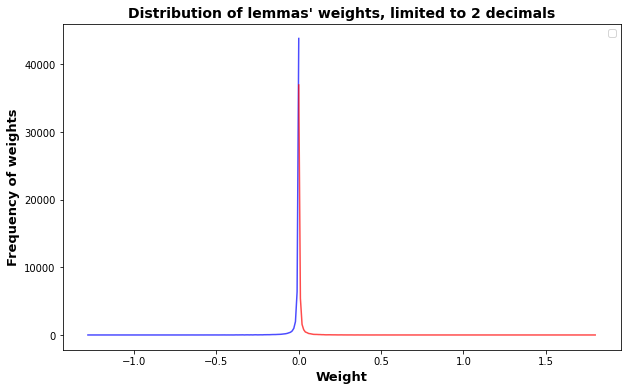

In [27]:
# VISUALIZE 5_BEFORE_SLICE_word_weight DISTRIBUTION
m_weights = p.load_json('../datasets/5_BEFORE_SLICE_word_weight_m.json')
f_weights = p.load_json('../datasets/5_BEFORE_SLICE_word_weight_f.json')
m_weights = list(m_weights.values())
f_weights = list(f_weights.values())

print("length of m_weight_dict:", len(m_weights))
print("length of f_weight_dict:", len(f_weights))

m_weights_rounded = []
for weight in m_weights:
    m_weights_rounded.append(round(float(-1*weight), 2))
x, y = np.unique(m_weights_rounded, return_counts=True)


plt.figure(figsize=[10,6])
plt.plot(x, y, color='b', alpha=0.7)


f_weights_rounded = []
for weight in f_weights:
    f_weights_rounded.append(round(float(weight), 2))
x, y = np.unique(f_weights_rounded, return_counts=True)

plt.plot(x, y, color='r', alpha=0.7)

ax2 = plt.gca()

plt.ylabel('Frequency of weights', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Weight', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of lemmas' weights, limited to 2 decimals", fontdict={'fontsize':14, 'fontweight': 'bold'})
plt.legend()
plt.show()

No handles with labels found to put in legend.


length of m_weight_dict: 1500
length of f_weight_dict: 1500


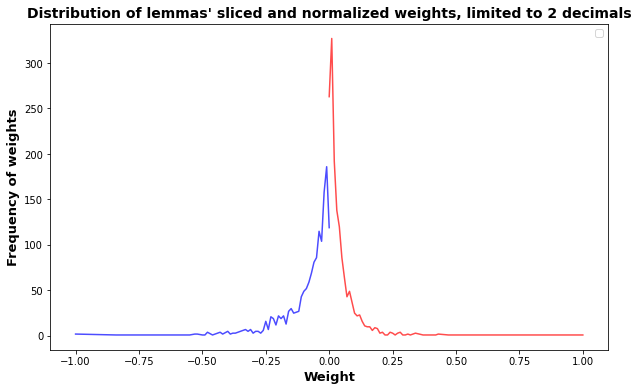

In [29]:
# VISUALIZE 5_word_weight_m/f_norm DISTRIBUTION
m_weights = p.load_json('../datasets/5_word_weight_m_norm.json')
f_weights = p.load_json('../datasets/5_word_weight_f_norm.json')
m_weights = list(m_weights.values())
f_weights = list(f_weights.values())

print("length of m_weight_dict:", len(m_weights))
print("length of f_weight_dict:", len(f_weights))

m_weights_rounded = []
for weight in m_weights:
    m_weights_rounded.append(round(float(-1*weight), 2))
x, y = np.unique(m_weights_rounded, return_counts=True)


plt.figure(figsize=[10,6])
plt.plot(x, y, color='b', alpha=0.7)


f_weights_rounded = []
for weight in f_weights:
    f_weights_rounded.append(round(float(weight), 2))
x, y = np.unique(f_weights_rounded, return_counts=True)

plt.plot(x, y, color='r', alpha=0.7)

ax2 = plt.gca()

plt.ylabel('Frequency of weights', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Weight', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of lemmas' sliced and normalized weights, limited to 2 decimals", fontdict={'fontsize':14, 'fontweight': 'bold'})
plt.legend()
plt.show()

No handles with labels found to put in legend.


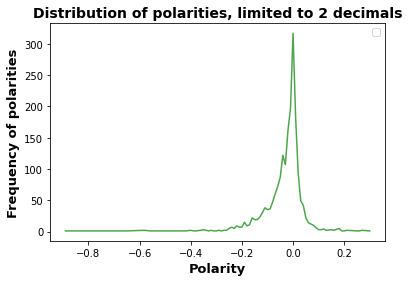

In [3]:
# VISUALIZE 6_polarity_dict_norm DISTRIBUTION
import numpy as np 
import matplotlib.pyplot as plt

m_weights = p.load_json('../datasets/5_word_weight_m_norm.json')
w_weights = p.load_json('../datasets/5_word_weight_f_norm.json')
pols = p.load_json('../datasets/6_polarity_dict_norm.json')
m_weights = list(m_weights.values())
w_weights = list(w_weights.values())
pols = list(pols.values())

# m_weights_rounded = []
# for weight in m_weights:
#     m_weights_rounded.append(round(float(-1*weight), 2))
# x, y = np.unique(m_weights_rounded, return_counts=True)


# plt.figure(figsize=[10,6])
# plt.plot(x, y, color='b', alpha=0.7)


# w_weights_rounded = []
# for weight in w_weights:
#     w_weights_rounded.append(round(float(weight), 2))
# x, y = np.unique(w_weights_rounded, return_counts=True)

# plt.plot(x, y, color='r', alpha=0.7)


pols_rounded = []
for weight in pols:
    pols_rounded.append(round(float(weight), 2))
x, y = np.unique(pols_rounded, return_counts=True)

plt.plot(x, y, color='g', alpha=0.7)


ax2 = plt.gca()

plt.ylabel('Frequency of polarities', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Polarity', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of polarities, limited to 2 decimals", fontdict={'fontsize':14, 'fontweight': 'bold'})
plt.legend()
plt.show()

No handles with labels found to put in legend.


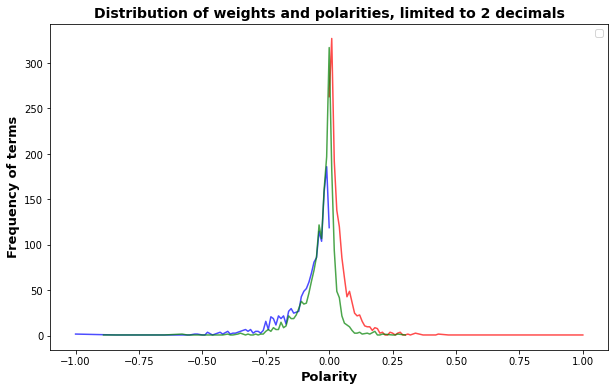

In [5]:
# VISUALIZE 5_word_weight_m/f_norm AND 6_polarity_dict_norm DISTRIBUTION
import numpy as np 
import matplotlib.pyplot as plt

m_weights = p.load_json('../datasets/5_word_weight_m_norm.json')
w_weights = p.load_json('../datasets/5_word_weight_f_norm.json')
pols = p.load_json('../datasets/6_polarity_dict_norm.json')
m_weights = list(m_weights.values())
w_weights = list(w_weights.values())
pols = list(pols.values())

m_weights_rounded = []
for weight in m_weights:
    m_weights_rounded.append(round(float(-1*weight), 2))
x, y = np.unique(m_weights_rounded, return_counts=True)


plt.figure(figsize=[10,6])
plt.plot(x, y, color='b', alpha=0.7)


w_weights_rounded = []
for weight in w_weights:
    w_weights_rounded.append(round(float(weight), 2))
x, y = np.unique(w_weights_rounded, return_counts=True)

plt.plot(x, y, color='r', alpha=0.7)


pols_rounded = []
for weight in pols:
    pols_rounded.append(round(float(weight), 2))
x, y = np.unique(pols_rounded, return_counts=True)

plt.plot(x, y, color='g', alpha=0.7)


ax2 = plt.gca()

plt.ylabel('Frequency of terms', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.xlabel('Polarity', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.title("Distribution of weights and polarities, limited to 2 decimals", fontdict={'fontsize':14, 'fontweight': 'bold'})
plt.legend()
plt.show()

In [35]:
# sentiment_corpus
pd.options.display.width = 0
pd.set_option('display.width', 5)
pd.set_option('display.max_columns', 10, 'display.width', 10, 'display.max_colwidth', 20, 'display.max_rows',100)
df = pd.read_json('../datasets/sentiment_corpus.json')

print('shape:', df.shape)
pd.options.display.width = 0
pd.set_option('display.width', 5)
df

shape: (4970467, 6)


,Sentence #,Word,Lemma,POS,Polarity,Gender
0,1,organizations,organization,NOUN,-0.223025,F
1,1,decided,decide,VERB,-0.039008,F
2,1,drop,drop,VERB,-0.058436,F
3,1,women,woman,NOUN,0.272143,F
4,1,accused,accuse,VERB,0.006282,F
...,...,...,...,...,...,...
4970462,668175,named,name,VERB,-0.030568,M
4970463,668175,options,option,NOUN,-0.051049,M
4970464,668175,potential,potential,ADJ,-0.096828,M
4970465,668175,landing,landing,NOUN,0.000000,M
